random elastic deformation
intensity (random & normalised)
randomgamma


In [80]:
import matplotlib.pyplot as plt
import imageio.v3 as iio
import SimpleITK as sitk
import torchio as tio
import numpy as np
import elastix
import os
import imp
import augmentation
imp.reload(augmentation)

<module 'augmentation' from 'd:\\TUe\\8DM20\\8DM20-Capita-Selecta\\ImageRegistration\\augmentation.py'>

In [3]:

# General file paths
BASE_PATH = "../DevelopmentData" # Change to developmentdata directory
PATIENT_PATHS = [os.path.join(BASE_PATH, f) for f in os.listdir(BASE_PATH) if not f.startswith('.')]
ELASTIX_PATH = os.path.join(r'C:\Users\20182717\Documents\TUe\Software\Elastix\elastix-5.0.0-win64\elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:\Users\20182717\Documents\TUe\Software\Elastix\elastix-5.0.0-win64\transformix.exe')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

# Load all patient data
mr_prostate_data = []
mask_data = []
for path in PATIENT_PATHS:
    # Individual path per patient
    prostate_path = os.path.join(path, "mr_bffe.mhd")
    mask_path = os.path.join(path, "prostaat.mhd")
    # Store image data in list
    mr_prostate_data.append(iio.imread(prostate_path))
    mask_data.append(iio.imread(mask_path))

# Convert to numpy array
mr_prostate_data = np.array(mr_prostate_data)
mask_data = np.array(mask_data)

# Define the patient index for "fixed" and "moving"
fixed_image_idx = 0
moving_image_idx = 1

# Fixed image
fixed_image_path = os.path.join(PATIENT_PATHS[fixed_image_idx], "mr_bffe.mhd")
fixed_image_mask_path = os.path.join(PATIENT_PATHS[fixed_image_idx], "prostaat.mhd")
fixed_image = mr_prostate_data[fixed_image_idx,...]
fixed_image_mask = mask_data[fixed_image_idx,...]

# Moving image
moving_image_path = os.path.join(PATIENT_PATHS[moving_image_idx], "mr_bffe.mhd")
moving_image_mask_path = os.path.join(PATIENT_PATHS[moving_image_idx], "prostaat.mhd")
moving_image = mr_prostate_data[moving_image_idx,...]
moving_image_mask = mask_data[moving_image_idx,...]

In [ ]:
aug_path = augmentation.reldef(fixed_image_path)
aug_reldef = iio.imread(aug_path)

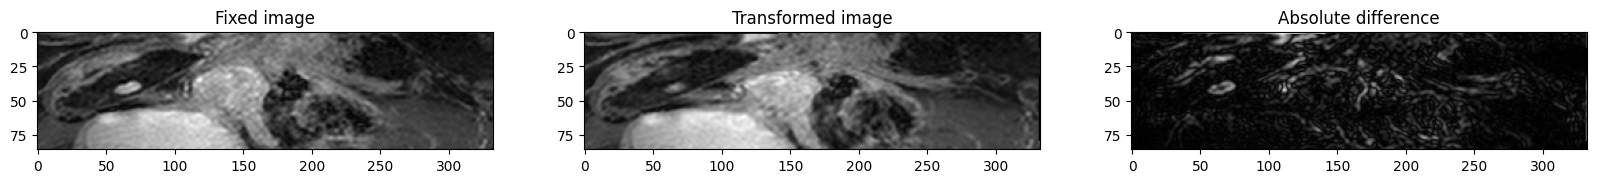

In [68]:

slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(aug_reldef[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-aug_reldef[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference");

In [70]:
aug_path = augmentation.random_gamma(fixed_image_path, (-0.5, 0.5))
aug_rgam = iio.imread(aug_path)

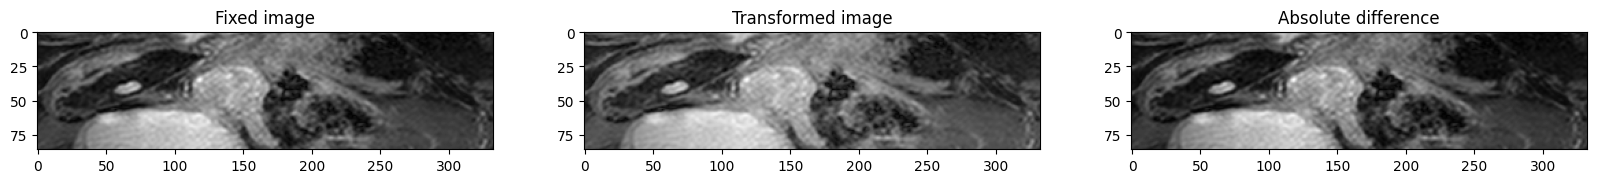

In [71]:
slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(aug_rgam[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-aug_rgam[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference");

In [72]:
aug_path = augmentation.normalise(fixed_image_path)
aug_norm = iio.imread(aug_path)

1609 4.095258179568273


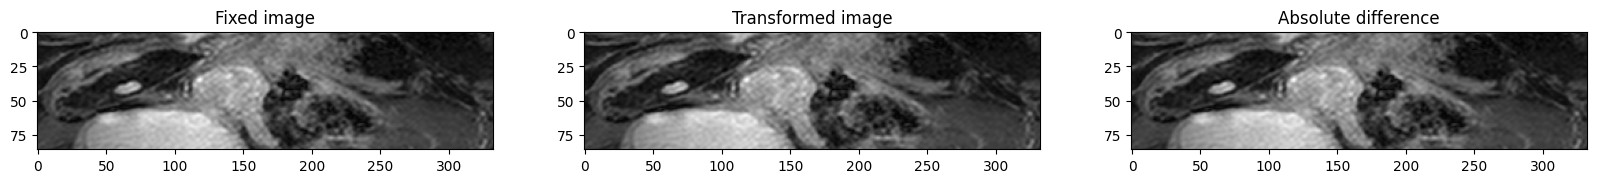

In [74]:
slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(aug_norm[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-aug_norm[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference")
print(fixed_image[:,:,slice].max(), aug_norm[:,:,slice].max())

In [75]:
aug_path = augmentation.rescale(fixed_image_path, (0, 255))
aug_resc = iio.imread(aug_path)

1609 164


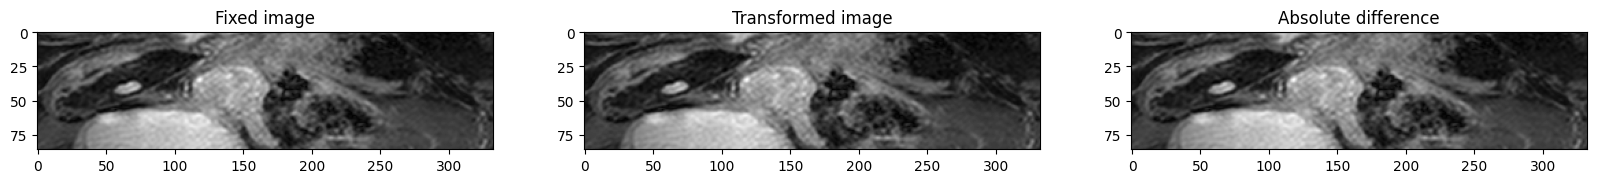

In [78]:
slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(aug_resc[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-aug_resc[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference");
print(fixed_image[:,:,slice].max(), aug_resc[:,:,slice].max())

In [81]:
aug_path = augmentation.random_rotation(fixed_image_path, (-15, 15, 0, 0, 0, 0))
aug_rot = iio.imread(aug_path)

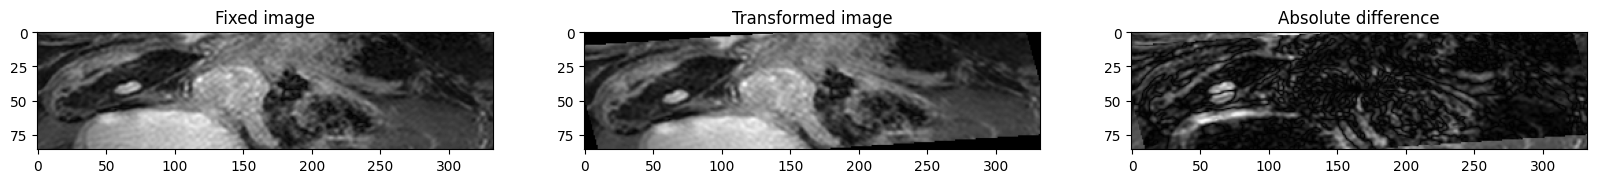

In [82]:
slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(aug_rot[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-aug_rot[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference");

In [2]:
import augmentation
data_folder_paths = [
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p102", 
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p107", 
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p108", 
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p109", 
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p115", 
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p116", 
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p117", 
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p119",
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p120",
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p125",
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p127",
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p128",
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p129",
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p133",
    "D:\TUe\8DM20\8DM20-Capita-Selecta\DevelopmentData\p135"
    ]

for folder in data_folder_paths:
    augmentation.normalise(folder + "\mr_bffe.mhd")